In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun9_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
hists = {}
hists["Target_kaon_mass"] = hist.Hist("Target SP Kaons",
                                hist.Bin("m", r"Reconstructed Mass [MeV]", 80, 0, 1000),
                            ) 
hists["Target_pion_mass"] = hist.Hist("Target SP Kaons",
                                hist.Bin("m", r"Mass [MeV]", 80, 0, 300),
                            ) 

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon_dau1 = ldmx_events['Sim_Kaon_dau1']
    target_kaon_dau2 = ldmx_events['Sim_Kaon_dau2']
    
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    
    kshort_mask = (abs(target_kaon_dau2.mompdgID)==kshort_pdgid)       
    pidau2_mask = (abs(target_kaon_dau2.pdgID)==chargedpion_pdgid)

    pidau1 = get_vector(target_kaon_dau1[pidau2_mask & kshort_mask])
    pidau2 = get_vector(target_kaon_dau2[pidau2_mask & kshort_mask])

    pisum = (pidau1 + pidau2)
    print('dau1 e', flat(pidau1[pisum.mass<=400].t))
    print('dau1 pdgID', flat(target_kaon_dau1[pisum.mass<=400].pdgID))
    print('mom1 pdgID', flat(target_kaon_dau1[pisum.mass<=400].mompdgID))
    print('dau2 e', flat(pidau2[pisum.mass<=400].t))
    #print(flat(pidau1.mass).shape)
    #print(flat(pidau2.mass).shape)
    #print(flat(pisum.mass).shape)
    #print(np.append(flat(pidau1.mass),flat(pidau2.mass)).shape)
    
    hists["Target_kaon_mass"].fill(      
                                 m=flat(pisum.mass),      
                                )
    hists["Target_pion_mass"].fill(      
                                 m=np.append(flat(pidau1.mass),flat(pidau2.mass)),      
                                )
    
    return

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
dau1 e [0.97614515 1.0774584  1.0401322  2.0385048 ]
dau1 pdgID [11. 11. 11. 11.]
mom1 pdgID [ 321. -321. -321. -321.]
dau2 e [338.814   439.44217 822.642   303.8761 ]
process 2
dau1 e [1.2753738 1.207186  0.8404454 1.6492667 1.9593774]
dau1 pdgID [11. 11. 11. 11. 11.]
mom1 pdgID [ 321. -321. -321. -321. -321.]
dau2 e [401.0494  718.5172  417.80807 288.70694 249.50914]
process 3
dau1 e [2.0649438 0.9500699 2.4531293 1.8795109]
dau1 pdgID [11. 11. 11. 11.]
mom1 pdgID [ 321. -321. -321. -321.]
dau2 e [299.15802 276.42413 790.17175 220.46864]
process 4
dau1 e [  1.021504    0.806649    0.8270871 119.35054     1.0718446   1.5593783]
dau1 pdgID [ 11.  11.  11. -14.  11.  11.]
mom1 pdgID [-321.  321. -321. -321. -321. -321.]
dau2 e [210.27557 253.00609 359.47348 490.181   205.53265 146.41963]
process 5
dau1 e [1.0003431 2.406845  1.1296335 4.0706806 1.3548518]
dau1 pdgID [11. 11. 11. 11. 11.]
mom1 pdgID [ 321. -321.  321. -321.  321.]
dau2 e [300.0563  506.46893 349.28348 374.57645

/usr/local/lib/python3.9/site-packages/awkward/_connect/_numpy.py:160: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


process 13
dau1 e [0.9380108 4.338977 ]
dau1 pdgID [11. 11.]
mom1 pdgID [ 321. -321.]
dau2 e [387.17746 565.53204]
process 14
dau1 e [1.0711352 0.9342815 1.0518851]
dau1 pdgID [11. 11. 11.]
mom1 pdgID [-321.  321. -321.]
dau2 e [252.19835 298.5861  438.3089 ]
process 15
dau1 e [0.9474149  0.9780473  1.2143894  1.871732   0.98477393 0.99247426]
dau1 pdgID [11. 11. 11. 11. 11. 11.]
mom1 pdgID [-321.  321. -321.  321.  321. -321.]
dau2 e [254.00455 601.4295  428.07632 364.5382  590.2938  303.80972]
process 16
dau1 e [1.3050745  0.84411013 0.9873122 ]
dau1 pdgID [11. 11. 11.]
mom1 pdgID [ 321. -321. -321.]
dau2 e [226.64996 335.43936 245.35008]
process 17
dau1 e [0.8557349 2.7256434 1.6791661 1.3003455 1.0240179]
dau1 pdgID [11. 11. 11. 11. 11.]
mom1 pdgID [-321.  321. -321. -321.  321.]
dau2 e [248.86966 226.14441 337.14087 371.33774 164.15219]
process 18
dau1 e [0.86570287 1.0425626  1.0425876  6.445981   1.2714398  1.4572171 ]
dau1 pdgID [11. 11. 11. 11. 11. 11.]
mom1 pdgID [-321. -321.

process 55
dau1 e [4.3761907  1.0728257  1.1021029  0.7974937  0.956807   1.1454962
 1.2045805  0.89188147]
dau1 pdgID [11. 11. 11. 11. 11. 11. 11. 11.]
mom1 pdgID [-321. -321. -321. -321. -321. -321. -321. -321.]
dau2 e [188.27576 348.59808 264.7442  407.03613 662.8962  192.19315 348.34982
 372.78336]
process 56
dau1 e [1.6390777  1.897651   2.7017753  0.92010087 0.86374044 1.1036774
 1.0290575 ]
dau1 pdgID [11. 11. 11. 11. 11. 11. 11.]
mom1 pdgID [-321. -321.  321. -321. -321. -321. -321.]
dau2 e [540.24976 827.4487  330.3585  212.37042 293.55267 330.42593 537.35077]
process 57
dau1 e [0.98335916 0.9560388  0.9643314  0.94363886]
dau1 pdgID [11. 11. 11. 11.]
mom1 pdgID [ 321.  321.  321. -321.]
dau2 e [ 444.72815  418.4842   253.51826 1192.8683 ]
process 58
dau1 e [0.903339  1.6740136 1.0844116]
dau1 pdgID [11. 11. 11.]
mom1 pdgID [-321. -321. -321.]
dau2 e [261.71237 253.50279 625.6712 ]
process 59
dau1 e [0.9700989 0.9825403 0.8370813 1.6566592 1.0186788]
dau1 pdgID [11. 11. 11. 11

<Hist (m) instance at 0x128f59220>


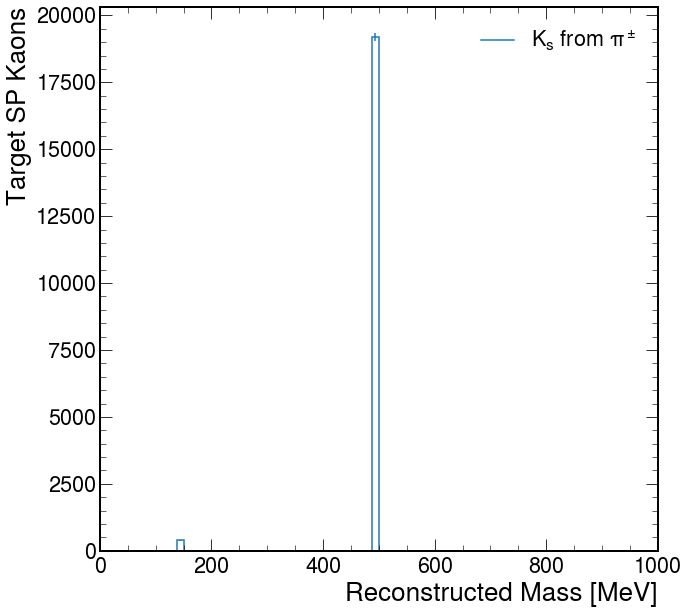

In [7]:
print(hists["Target_kaon_mass"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_kaon_mass"],ax=ax,clear=False);
leg = ax.legend([r'$K_s$ from $\pi^\pm$'])

<Hist (m) instance at 0x128f59160>


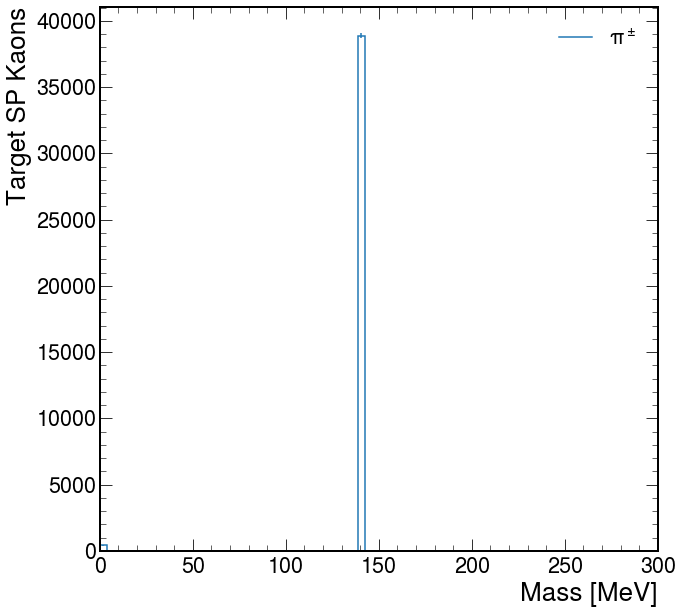

In [8]:
print(hists["Target_pion_mass"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_pion_mass"],ax=ax,clear=False);
leg = ax.legend([r'$\pi^\pm$'])